<a href="https://www.kaggle.com/code/hossamrizk/pytorch-cnn-transfer-learning?scriptVersionId=149256425" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import display, HTML, Javascript
import warnings
warnings.filterwarnings('ignore')

color_map = ['#FFFFFF','#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
                                            main_color,  main_color, prompt, main_color, main_color, 
                                            main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

/tmp/ipykernel_26/2492527517.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


## <b>1 <span style='color:#F1A424'>|</span> Welcome</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.1 |</span></b> What will you learn?</b></p>
</div>

- I will show you how to use CNN and transfer Learning with pytorch.I already did it with Tensorflow and explained CNN in details [Click Here](http://www.kaggle.com/code/hossamrizk/your-first-step-in-cnn)
- So I will not explain what is the CNN or how it works if you feel a lack of understanding about how things work go and check the link above it will help

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.2 |</span></b> Problem Statement</b></p>
</div>

- COVID-19 is a disease caused by a virus. The most common symptoms are fever, chills, and sore throat, but there are a range of others.
- Most people make a full recovery without needing hospital treatment. People with severe symptoms should seek medical care as soon as possible.
- Over 760 million cases and 6.9 million deaths have been recorded worldwide since December 2019, but the actual number is thought to be higher.
- Over 13 billion vaccine doses have been administered as of June 2023.
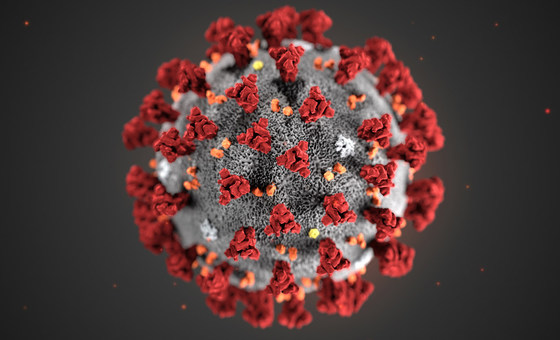

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.3 |</span></b> Study Aim</b></p>
</div>

The aim of this study was to investigate the potential of using **<mark style="background-color:#F1C40F;color:white;border-radius:5px;opacity:0.9">PyTorch</mark>** Deep Learning module:
  - For <b>Classification of whether a person is sick or not</b>

## <b>2 <span style='color:#F1A424'>|</span> Import libraries and load data</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.1 |</span></b> Install torchsummary library </b></p>
</div>

- The torchsummary library is a useful tool in PyTorch that provides a summary of a PyTorch model, detailing the model architecture and the number of parameters in each layer. This summary helps in understanding the overall structure of the model, especially when dealing with complex neural network architectures.

In [2]:
!pip -q install torchsummary

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.2 |</span></b> Import libraries </b></p>
</div>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

import torch 
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.3 |</span></b> Enable GPU and make Transforms</b></p>
</div>

- First we set GPU on to run our model, It is faster than cpu
- Second perform data augmentation by transforms: Resizes the input image to a square with a side length of 256 pixels while preserving the aspect ratio
- Crops the center part of the image to make it 224x224 pixels. This step helps standardize the input size for the model
- Converts the image to a PyTorch tensor. This is a fundamental step to convert the image into a format that can be used as input for a neural network.
- Normalizes the image with the specified mean and standard deviation values along each channel. In this case, the mean for each channel is set to 0.5 and the standard deviation to 0.25.

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
transform = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=np.array([0.5, 0.5, 0.5]), 
                             std=np.array([0.25, 0.25, 0.25]))
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=np.array([0.5, 0.5, 0.5]), 
                             std=np.array([0.25, 0.25, 0.25]))
    ]),
    
}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.4 |</span></b> Load Data</b></p>
</div>

- First line defines the directory where the dataset is located.
- Second line prepares the training dataset using the <code>ImageFolder</code> class from PyTorch  <code>torchvision</code> module. It assumes that the training data is located in the 'train' subdirectory within the specified <code>datadir</code> The transformation specified by <code>transform['train']</code>  is applied to the images during loading.
- Third line prepares the test dataset similar to the training dataset. It assumes that the test data is located in the 'test' subdirectory within the specified<code>datadir</code> The transformation specified by <code>transform['test']</code>is applied to the images during loading.
- Fourth line creates a DataLoader object for the training dataset. It uses the <code>DataLoader</code>class from PyTorch to load the training data in batches of size 8. The <code>Shuffle=True</code> argument ensures that the data is shuffled before being divided into batches, which can help in better generalization during training.
- Fifth line Similarly, creates a DataLoader object for the test dataset, with the same batch size and shuffle setting as the training DataLoader.

In [6]:
data_dir = '/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19'
train_data = ImageFolder(os.path.join(data_dir, 'train'), transform['train'])
test_data = ImageFolder(os.path.join(data_dir, 'test'), transform['test'])

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=True)

## <b>3 <span style='color:#F1A424'>|</span> Define helper functions</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1 |</span></b> Validate function </b></p>
</div>

- - This function used to validate a trained deep learning model on a validation dataset.
- <code>model.eval()</code> puts the model in evaluation mode, which is necessary to disable dropout and batch normalization layers during the validation phase.
- <code>total_val_loss = 0.0</code> & <code>correct_val_predictions = 0</code> & <code>total_val_samples = 0</code> initializes the total validation loss,the count of correct validation predictions and the count of total validation samples to zero.
- <code>with torch.no_grad():</code> This is a context manager that disables gradient calculation. It is used during validation to speed up the process and reduce memory usage.
- The <code>for</code> loop iterates over the <code>test_loader</code> which contains the validation dataset, and performs the following steps for each batch: Transfers the batch of data and corresponding labels to the specified <code>device</code>, Passes the data through the model to obtain the validation outputs. Computes the validation loss using the provided <code>criterion</code>, Updates the total validation loss by adding the current batch's loss.
- The code then calculates the validation accuracy: It uses the <code>torch.max</code> unction to get the indices of the maximum value along the specified dimension, Compares the predicted labels with the true labels to count the number of correct predictions and then updates the count of total validation samples.
- Finally, the function computes the average validation loss and validation accuracy and returns these values. The average validation loss is computed as the total validation loss divided by the number of batches in the validation dataset, while the validation accuracy is the ratio of correct predictions to the total number of validation samples, expressed as a percentage.


In [7]:
def validate(model, test_loader, criterion, device=device):
    """
    Validate a trained deep learning model on a validation dataset.

    Args:
        model (torch.nn.Module): The trained neural network model to validate.
        val_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        criterion (torch.nn.Module): The loss function used for validation.

    Returns:
        tuple: A tuple containing the validation loss and validation accuracy (in percentage).
    """
    model.eval()
    total_val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    with torch.no_grad():
        for data, labels in test_loader:
            val_inputs = data.to(device)
            val_labels = labels.to(device)

            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)

            total_val_loss += val_loss.item()

            # Calculate validation accuracy
            _, predicted_val = torch.max(val_outputs, 1)
            correct_val_predictions += (predicted_val == val_labels).sum().item()
            total_val_samples += val_labels.size(0)

    validation_accuracy = correct_val_predictions / total_val_samples
    return total_val_loss / len(test_loader), validation_accuracy * 100

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.2 |</span></b> Calculate size after using max-pooling </b></p>
</div>

-  This function is used to calculate the output shape after applying max pooling to an input image
- The fucntion takes three parameters: Height, Width and channels of the in image 

In [8]:
def calculate_max_pool_output_shape(input_height, input_width, pool_size=2):
    """
    Calculate the output shape after applying max pooling to an input image.

    Parameters:
        input_height (int): The height of the input image.
        input_width (int): The width of the input image.
        pool_size (int, optional): The size of the pooling window. Defaults to 2.

    Returns:
        tuple: A tuple containing the output height and width after max pooling.
    """
    output_height = int(input_height / pool_size)
    output_width = int(input_width / pool_size)
    return output_height, output_width

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.3 |</span></b> Calculate output shape of Conv2D </b></p>
</div>

- This function is valuable for understanding how the dimensions of a feature map change after passing through a 2D convolutional layer in a neural network. It helps in designing and configuring subsequent layers in the network architecture.
- This function is used to calculate the output shape of Conv2D
- The fucntion takes three parameters: Height, Width and the 2D convolutional layer for which to calculate the output shape. 
- It retrieves the attributes of the convolutional layer such as <code>kernel_size</code> ,<code>stride</code> , <code>padding</code> and <code>dilation</code>
- Using the retrieved values, the function then calculates the output height and width based on the convolutional layer's parameters. This is done using the formula that considers the kernel size, stride, padding, and dilation.
- The function returns a tuple containing the calculated output height and width after applying the convolutional layer.

In [9]:
def find_conv2d_output_shape(height, width, conv):
    """
    Calculate the output shape of a 2D convolutional layer.

    Parameters:
        height (int): The height of the input feature map.
        width (int): The width of the input feature map.
        conv (nn.Conv2d): The convolutional layer for which to calculate the output shape.

    Returns:
        tuple: A tuple containing the output height and width after applying the convolutional layer.
    """
    # Get convolutional layer arguments
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding
    dilation = conv.dilation

    # Calculate output height and width
    height = np.floor((height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) / stride[0] + 1)
    width = np.floor((width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) / stride[1] + 1)

    return int(height), int(width)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.4 |</span></b> Train function </b></p>
</div>


- This function provides a comprehensive training loop for a deep learning model, enabling the model to learn from the provided training dataset using the specified optimizer and loss function. It also allows for optional validation during training to monitor the model's performance on unseen data.
- The neural network model to train & <code>train_loader</code> DataLoader for the training dataset & <code>optimizer</code> The optimizer used for training & <code>optimizer</code> The optimizer used for training & <code>criterion</code> The loss function used for training & <code>scheduler (optional)</code> An optional learning rate scheduler & <code>test_loader (optional)</code> DataLoader for the validation dataset & <code>epochs (int, optional)</code>  The number of training epochs. The default value is 10
- Inside the function, a loop runs for the specified number of epochs. Within each epoch, the following steps are performed: The model is put in training mode, <code>total_loss</code> & <code>correct_train_predictions</code> & <code>total_train_samples</code>  are initialized. The training data is iterated over, and the forward pass, loss computation, backpropagation, and optimization steps are performed. Training loss and accuracy are computed and printed for each epoch.
- If a validation dataset is provided, the <code>validate</code>  function is called to compute the validation loss and accuracy, which are then printed for each epoch.
- After completing the training loop for all epochs, the function prints 'Training finished' to indicate the completion of the training process.


In [10]:
def train(model, train_loader, optimizer, criterion,
          scheduler=None, test_loader=None, epochs=10, device=device):
    """
    Train a deep learning model.

    Args:
        model (torch.nn.Module): The neural network model to train.
        train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
        val_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        optimizer (torch.optim.Optimizer): The optimizer used for training.
        criterion (torch.nn.Module): The loss function used for training.
        epochs (int, optional): The number of training epochs. Default is 10.

    Returns:
        None
    """
    for epoch in range(epochs):
        # Training loop
        model.train()
        total_loss = 0.0
        correct_train_predictions = 0
        total_train_samples = 0

        for data, labels in train_loader:
            inputs = data.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
        
            # Compute the loss
            loss = criterion(outputs, labels)

            # Backpropagation and optimization
            loss.backward()
            optimizer.step()
            if scheduler:
                scheduler.step()

            total_loss += loss.item()

            # Calculate training accuracy
            _, predicted_train = torch.max(outputs, 1)
            correct_train_predictions += (predicted_train == labels).sum().item()
            total_train_samples += labels.size(0)

        training_accuracy = correct_train_predictions / total_train_samples

        print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {total_loss / len(train_loader):.3f}, Training Accuracy: {training_accuracy * 100:.3f}%')
        if test_loader is not None:
            # Validation step using the callback
            val_loss, val_accuracy = validate(model, test_loader, criterion,device=device)
            print(f'Epoch [{epoch + 1}/{epochs}], Validation Loss: {val_loss:.3f}, Validation Accuracy: {val_accuracy:.3f}%\n')


    print('Training finished')
    

</div>


- This dictionary contains key-value pairs that define specific configuration settings for a deep learning model.
- <code>input_shape": (3, 224, 224)</code> This key-value pair represents the input shape for the data that the model will receive. The shape <code>(3, 224, 224)</code> implies that the input data will have three channels (e.g., for RGB images) and a spatial resolution of 224x224. The first value '3' denotes the number of channels, and the subsequent two values '224' represent the height and width of the input data.
- <code>classes : 2</code> This key-value pair indicates the number of classes in the classification task. In this case, the value '2' suggests that the model is designed for a binary classification task where there are two classes. This configuration is essential for defining the number of output units in the final layer of the model, ensuring that the model produces appropriate predictions for the specified number of classes.

In [11]:
config = {
    "input_shape": (3, 224, 224),
    "classes": 2 
}

## <b>4 <span style='color:#F1A424'>|</span> Model</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.1 |</span></b> CNN model </b></p>
</div>


- <code>__init__ method:</code> This method initializes the CNN class, taking the <code>config</code> dictionary as input, It extracts the <code>input_shape</code> & <code>classes</code> values from the <code>config</code> dictionary which represent the input shape and the number of classes in the dataset respectively, The architecture includes two convolutional layers with ReLU activation, a max pooling layer, a flattening layer, and a fully connected layer.
- <code>forward method:</code> This method defines the forward pass of the CNN,The input data <code>x</code> passes through the first convolutional layer <code>conv1</code> followed by the ReLU activation <code>relu1</code>, The output is then passed through the second convolutional layer <code>conv2</code> and ReLU activation <code>relu2</code>, After that, max pooling is applied using the defined <code>maxpool</code> layer, The output is <code>flatten</code> using the flatten layer and passed through the fully connected layer <code>linear1</code> to get the final output of the network.
- <code>find_conv2d_output_shape</code> This function is used to calculate the output shape after applying a 2D convolutional layer, based on the input feature map shape and the properties of the convolutional layer.
- <code>calculate_max_pool_output_shape</code> This function is used to calculate the output shape after applying max pooling to an input image, considering the input height, width, and pool size.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.2 |</span></b> Random seed </b></p>
</div>


- Setting a random seed ensures that the random initialization and processing within the code remain consistent and reproducible across different runs, making it easier to compare results and debug the code effectively.
- <code>Setting the Random Seed:</code> The variable <code>random_seed:</code> is initialized with a specific integer value (in this case, 123). This value will be used as the seed for the random number generator.
- <code>Setting the Seed for CPU:</code> By using <code>random.seed(random_seed)</code> and <code>torch.manual_seed(random_seed)</code> the code sets the random seed for the Python random module and the PyTorch random number generator on the CPU, respectively. This ensures that any random operations or initializations performed using these libraries on the CPU will yield the same results across different runs, given the same input data and model architecture.
- <code>Setting the Seed for CUDA (GPU):</code> The code checks whether CUDA is available using <code>torch.cuda.is_available()</code>  If it is, the lines <code>torch.cuda.manual_seed(random_seed)</code> and <code>torch.cuda.manual_seed_all(random_seed)</code> set the random seed for the PyTorch random number generator on the GPU. This step is crucial when the code involves GPU operations, ensuring that the results of any random operations or initializations performed on the GPU are also consistent and reproducible across different runs.
- By incorporating these random seed settings, the code ensures that any random process, such as weight initialization, data shuffling, or dropout, occurs in a consistent manner. This consistency is especially critical when dealing with deep learning models, as it facilitates better debugging and model performance comparison across various hardware configurations and software environments.

In [12]:
# Set a random seed for reproducibility
random_seed = 123
random.seed(random_seed)
torch.manual_seed(random_seed)

# If CUDA is available, set a random seed for CUDA as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

class CNN(nn.Module):
    def __init__(self, config):
        super(CNN, self).__init__()
        c, h, w = config['input_shape']
        classes = config['classes']
        
        # CNN Layer 1
        self.conv1 = nn.Conv2d(c, 32, kernel_size=3)
        self.relu1 = nn.ReLU()
        h, w = find_conv2d_output_shape(h, w, self.conv1)
        
        # CNN layer 2
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3)
        self.relu2 = nn.ReLU()
        h, w = find_conv2d_output_shape(h, w, self.conv2)
        
        # Max Pooling layer
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        h, w = calculate_max_pool_output_shape(h, w, 2)
        
        # Flatten layer 
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(h * w * 32, classes)
        
    def forward(self, x):
        # First layer
        x = self.conv1(x)
        x = self.relu1(x)
        
        # Second layer
        x = self.conv2(x)
        x = self.relu2(x)
        
        # Maxpooling
        x = self.maxpool(x)
        
        # Flatten
        x = self.flatten(x)
        x = self.linear1(x)
        
        return x 


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.3 |</span></b> Optimizer and Loss function </b></p>
</div>


- <code>model = CNN(config).to(device):</code> This line creates an instance of the CNN class using the provided configuration config and then moves the model to the specified device. The .to(device) method is used to transfer the model to either a CPU or a CUDA device to leverage hardware acceleration.
- <code>criterion = nn.CrossEntropyLoss():</code> This line initializes the loss function, which, in this case, is the Cross Entropy Loss. Cross Entropy Loss is commonly used in multi-class classification tasks and is particularly well-suited for models that output a probability distribution over multiple classes.
- <code>optimizer = torch.optim.SGD(model.parameters(), lr=0.001):</code> This line sets up the optimization algorithm for training the model. Stochastic Gradient Descent (SGD) is a popular optimization algorithm used to update the parameters of the neural network during the training process. Here, it is used with a learning rate of 0.001. The model.parameters() function provides all the parameters of the model that need to be optimized during the training process.

In [13]:
model = CNN(config).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.4 |</span></b> Model summary </b></p>
</div>

- This summary is particularly helpful for gaining insights into the model's architecture, understanding the number of parameters, and ensuring that the model is constructed as intended. It aids in verifying the connectivity and dimensionality of the layers, which can be crucial for debugging and optimizing the neural network architecture.
- The output of the summary function will display a table that includes the following details for each layer: Layer type, Output shape, Number of parameters and Number of parameters that require gradient computation (if applicable)

In [14]:
from torchsummary import summary
summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 222, 222]             896
              ReLU-2         [-1, 32, 222, 222]               0
            Conv2d-3         [-1, 32, 220, 220]           9,248
              ReLU-4         [-1, 32, 220, 220]               0
         MaxPool2d-5         [-1, 32, 110, 110]               0
           Flatten-6               [-1, 387200]               0
            Linear-7                    [-1, 2]         774,402
Total params: 784,546
Trainable params: 784,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 53.61
Params size (MB): 2.99
Estimated Total Size (MB): 57.17
----------------------------------------------------------------


In [15]:
train(model, train_loader, optimizer, criterion,
          scheduler=None, test_loader=test_loader, epochs=10, device=device)

Epoch [1/10], Training Loss: 0.649, Training Accuracy: 72.973%
Epoch [1/10], Validation Loss: 0.406, Validation Accuracy: 77.500%

Epoch [2/10], Training Loss: 0.259, Training Accuracy: 91.216%
Epoch [2/10], Validation Loss: 0.377, Validation Accuracy: 87.500%

Epoch [3/10], Training Loss: 0.178, Training Accuracy: 93.919%
Epoch [3/10], Validation Loss: 0.295, Validation Accuracy: 87.500%

Epoch [4/10], Training Loss: 0.141, Training Accuracy: 95.946%
Epoch [4/10], Validation Loss: 0.295, Validation Accuracy: 90.000%

Epoch [5/10], Training Loss: 0.120, Training Accuracy: 97.297%
Epoch [5/10], Validation Loss: 0.282, Validation Accuracy: 87.500%

Epoch [6/10], Training Loss: 0.118, Training Accuracy: 96.622%
Epoch [6/10], Validation Loss: 0.344, Validation Accuracy: 82.500%

Epoch [7/10], Training Loss: 0.100, Training Accuracy: 96.622%
Epoch [7/10], Validation Loss: 0.341, Validation Accuracy: 90.000%

Epoch [8/10], Training Loss: 0.097, Training Accuracy: 97.297%
Epoch [8/10], Valida

</div>

- <code>Training Loss and Accuracy:</code> The training loss decreases steadily from 0.649 to 0.068 over the ten epochs. This reduction indicates that the model is effectively learning from the training data, as the loss decreases, indicating that the predictions are getting closer to the actual values. Similarly, the validation loss fluctuates but generally remains within a reasonable range, suggesting that the model is not overfitting the training data excessively.
- <code>Validation Loss and Accuracy:</code> The training accuracy increases from 72.973% to 98.649% over the ten epochs, indicating that the model is learning the training data effectively and making increasingly accurate predictions. The validation accuracy fluctuates but generally remains relatively high, ranging from 77.5% to 90%, indicating that the model is performing well on unseen validation data.
- <code>Consistency Analysis:</code> The fluctuations in both the training and validation accuracy and loss suggest that the model might benefit from further fine-tuning or regularization techniques to improve its generalization capabilities and reduce overfitting.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.5 |</span></b> Predictions for CNN model </b></p>
</div>

In [16]:
def plot_prediction_CNN(model, test_loader, class_names, device, n_images):
    """
    Test the model on random predictions
    Args:
    model: the trained model
    test_loader: DataLoader instance for the test dataset
    class_names: list of class names
    device: the device on which to run the model (e.g., 'cuda' or 'cpu')
    n_images: number of images to plot
    """
    model.eval()
    with torch.no_grad():
        fig = plt.figure(figsize=(14, 15))
        for i, (images, labels) in enumerate(test_loader):
            if i >= n_images:
                break
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            for j in range(images.shape[0]):
                if i >= n_images:
                    break
                plt.subplot(4, 3, i + 1)
                image = images.cpu().numpy()[j].transpose(1, 2, 0)
                label = labels.cpu().numpy()[j]
                prediction = predictions.cpu().numpy()[j]
                plt.imshow(image)
                if prediction == label:
                    title_obj = plt.title(class_names[label])
                    plt.setp(title_obj, color='g')
                else:
                    title_obj = plt.title(class_names[label] + ' Misclassified as ' + class_names[prediction])
                    plt.setp(title_obj, color='r')
                plt.axis('off')
                i += 1
        plt.show()

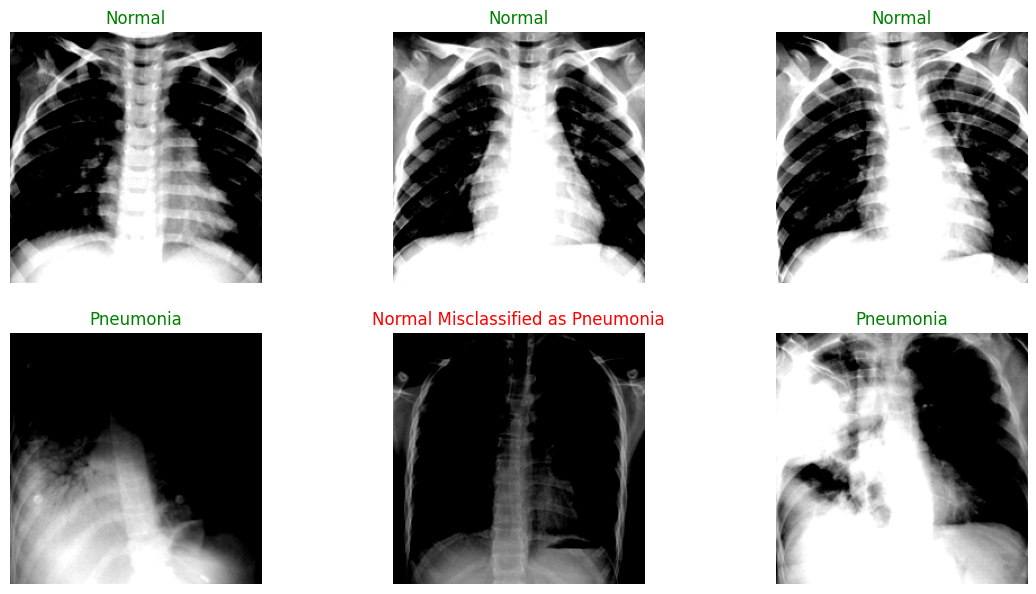

In [17]:
class_names = ['Normal','Pneumonia']
plot_prediction_CNN(model, test_loader=test_loader, class_names=class_names, device=device, n_images=6)

## <b>5 <span style='color:#F1A424'>|</span> Transfer Learning</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.1 |</span></b> What is the transfer learning? </b></p>
</div>


- Transfer learning is a machine learning technique where a model trained on one task is repurposed for a second related task. In this approach, knowledge gained from solving one problem is applied to a different but related problem. Instead of training a model from scratch, transfer learning leverages pre-trained models that have been trained on large datasets, typically for a different task.
- The key idea behind transfer learning is that the knowledge gained while solving one problem can be useful in solving other related problems.
- <code>Save time and computational resources:</code> Rather than training a model from scratch on a new dataset, you can start with a pre-trained model and fine-tune it for the new task, which requires less data and time.
- <code>Improve model performance:</code> Pre-trained models have learned features from large-scale datasets, which can be useful for tasks with limited data. Transfer learning can enhance the performance of a model on a new task, especially when the new dataset is small.
- <code>Generalize better:</code> Pre-trained models capture general features from the data that can be applied to various related tasks, helping the model to generalize better.
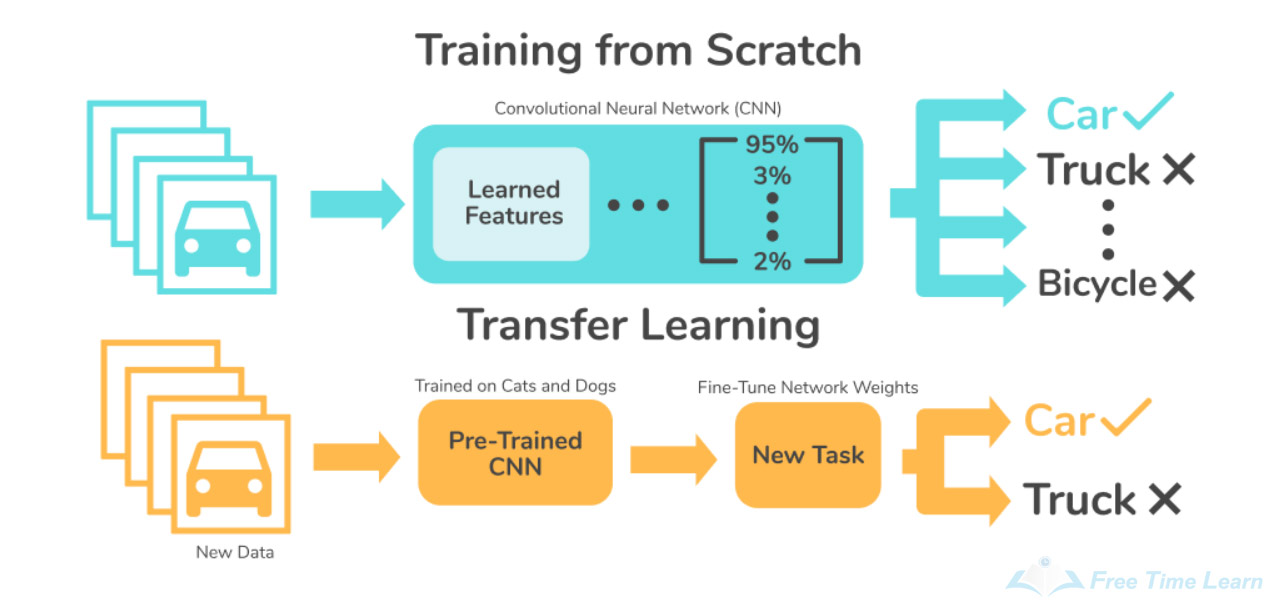

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.2 |</span></b> VGG16 model </b></p>
</div>


- <code>vgg_model = models.vgg16(weights=True):</code> This line loads the pre-trained VGG-16 model from the torchvision.models module with the weights set to be True. This loads the model architecture and its pre-trained weights.
- <code>vgg_model.classifier[6].out_features = 2</code> This line adjusts the number of output features in the last fully connected layer of the VGG-16 model to match the specific classification task at hand. Here, the number of output features is set to 2, indicating a binary classification task with two classes.
- <code>vgg_model = vgg_model.to(device)</code> This line moves the VGG-16 model to the specified device (e.g., a GPU) to take advantage of hardware acceleration for faster computation.


In [18]:
# Set a random seed for reproducibility
random_seed = 123
random.seed(random_seed)
torch.manual_seed(random_seed)

# If CUDA is available, set a random seed for CUDA as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    
vgg_model = models.vgg16(weights=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 189MB/s]


In [19]:
vgg_model.classifier[6].out_features = 2
vgg_model = vgg_model.to(device)
criterion_vgg = nn.CrossEntropyLoss()

# Set up the optimizer for training.  
optimizer_vgg = torch.optim.SGD(vgg_model.parameters(), lr=0.001)

train(vgg_model, train_loader, optimizer_vgg, criterion_vgg, scheduler=None,
          test_loader=test_loader, epochs=10, device=device)

Epoch [1/10], Training Loss: 2.134, Training Accuracy: 52.703%
Epoch [1/10], Validation Loss: 0.297, Validation Accuracy: 90.000%

Epoch [2/10], Training Loss: 0.218, Training Accuracy: 91.216%
Epoch [2/10], Validation Loss: 0.280, Validation Accuracy: 85.000%

Epoch [3/10], Training Loss: 0.133, Training Accuracy: 96.622%
Epoch [3/10], Validation Loss: 0.183, Validation Accuracy: 90.000%

Epoch [4/10], Training Loss: 0.155, Training Accuracy: 93.243%
Epoch [4/10], Validation Loss: 1.196, Validation Accuracy: 65.000%

Epoch [5/10], Training Loss: 0.057, Training Accuracy: 97.297%
Epoch [5/10], Validation Loss: 0.153, Validation Accuracy: 90.000%

Epoch [6/10], Training Loss: 0.019, Training Accuracy: 99.324%
Epoch [6/10], Validation Loss: 0.161, Validation Accuracy: 90.000%

Epoch [7/10], Training Loss: 0.024, Training Accuracy: 98.649%
Epoch [7/10], Validation Loss: 0.156, Validation Accuracy: 90.000%

Epoch [8/10], Training Loss: 0.010, Training Accuracy: 100.000%
Epoch [8/10], Valid

</div>

- <code>Training Loss and Accuracy:</code> The training loss reduces significantly from 2.136 to 0.008 over the ten epochs, indicating that the model is effectively learning the training data. The validation loss follows a similar trend, fluctuating slightly but generally decreasing, which suggests that the model is not overfitting the training data.
- <code>Validation Loss and Accuracy:</code>  The training accuracy increases notably from 52.703% to 100% over the ten epochs, indicating that the model is learning the training data well and making accurate predictions. The validation accuracy fluctuates but generally remains high, ranging from 62.5% to 95%, indicating that the model performs well on unseen validation data.
- <code>Overfitting Analysis:</code> The fluctuation in the validation loss and accuracy in some epochs suggests that the model might benefit from additional regularization techniques to improve its generalization capabilities and reduce overfitting, especially seen in the fourth epoch where the validation loss increases notably.
- <code>Consistency Analysis:</code> The model's performance seems quite impressive, with high training and validation accuracies and decreasing losses. However, it's crucial to monitor for signs of overfitting and consider implementing techniques such as dropout, batch normalization, or weight regularization to improve the model's robustness and generalization capabilities. Additionally, it's essential to assess the performance on a separate test set to ensure the model's reliability on completely unseen data.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.3 |</span></b> Predictions for VGG16 model </b></p>
</div>

In [20]:
def plot_prediction_VGG16(model, test_loader, class_names, device, n_images):
    """
    Test the model on random predictions
    Args:
    model: the trained model
    test_loader: DataLoader instance for the test dataset
    class_names: list of class names
    device: the device on which to run the model (e.g., 'cuda' or 'cpu')
    n_images: number of images to plot
    """
    vgg_model.eval()
    with torch.no_grad():
        fig = plt.figure(figsize=(14, 15))
        for i, (images, labels) in enumerate(test_loader):
            if i >= n_images:
                break
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            for j in range(images.shape[0]):
                if i >= n_images:
                    break
                plt.subplot(4, 3, i + 1)
                image = images.cpu().numpy()[j].transpose(1, 2, 0)
                label = labels.cpu().numpy()[j]
                prediction = predictions.cpu().numpy()[j]
                plt.imshow(image)
                if prediction == label:
                    title_obj = plt.title(class_names[label])
                    plt.setp(title_obj, color='g')
                else:
                    title_obj = plt.title(class_names[label] + ' Misclassified as ' + class_names[prediction])
                    plt.setp(title_obj, color='r')
                plt.axis('off')
                i += 1
        plt.show()

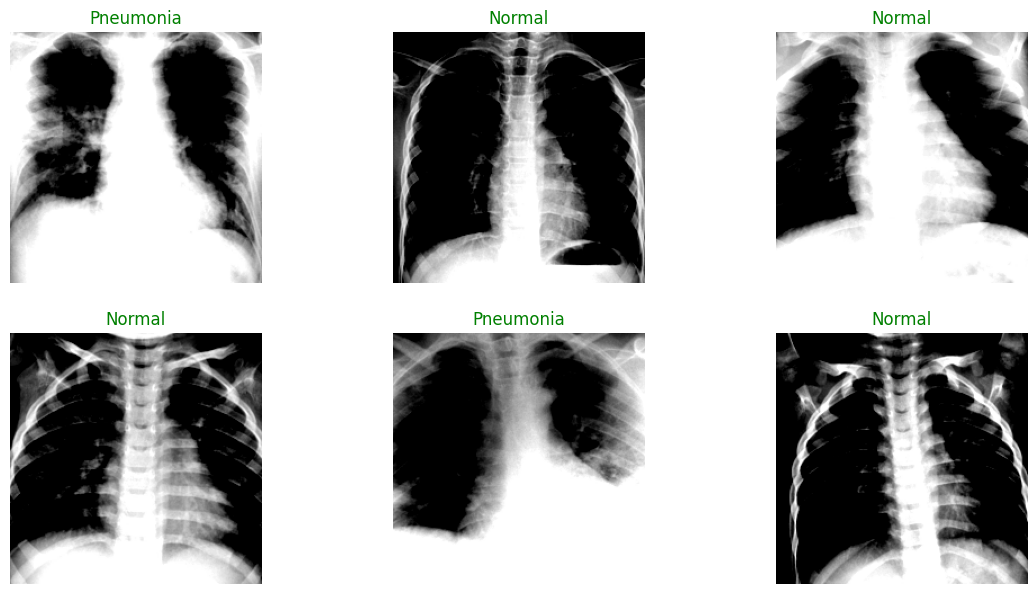

In [21]:
plot_prediction_VGG16(vgg_model, test_loader, class_names, device, n_images=6)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.4 |</span></b> Resnet50 model </b></p>
</div>


- <code>resnet50_model = models.resnet50(weights=True):</code> This line loads the pre-trained ResNet-50 model from the <code>torchvision</code>.models module with the pre-trained weights included. The ResNet-50 model is a deep convolutional neural network that has been pre-trained on a large dataset (e.g., ImageNet) to learn rich feature representations.
- <code>num_ftrs = resnet50_model.fc.in_features:</code> This line retrieves the number of input features of the last fully connected layer of the ResNet-50 model. The <code>fc</code> layer in the ResNet-50 model is the fully connected layer that comes after the convolutional layers and global average pooling layers. It serves as the classifier for the original ImageNet task.
- <code>resnet50_model.fc = nn.Linear(num_ftrs, 2):</code> This line replaces the fully connected layer <code>fc</code> of the pre-trained ResNet-50 model with a new linear layer <code>nn.linear</code> that has 2 output features. By modifying the last fully connected layer, the model is adapted to perform a different classification task, specifically for a binary classification problem with 2 output classes.

In [22]:
# Set a random seed for reproducibility
random_seed = 123
random.seed(random_seed)
torch.manual_seed(random_seed)

# If CUDA is available, set a random seed for CUDA as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

resnet50_model = models.resnet50(weights=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 229MB/s]


In [23]:
num_ftrs = resnet50_model.fc.in_features
resnet50_model.fc = nn.Linear(num_ftrs,2)
resnet50_model.to(device)
criterion_resnet = nn.CrossEntropyLoss()

# Set up the optimizer for training.  
optimizer_resnet = torch.optim.SGD(resnet50_model.parameters(), lr=0.001)

train(resnet50_model, train_loader, optimizer_resnet, criterion_resnet, scheduler=None,
          test_loader=test_loader, epochs=10, device=device)

Epoch [1/10], Training Loss: 0.665, Training Accuracy: 62.162%
Epoch [1/10], Validation Loss: 0.582, Validation Accuracy: 82.500%

Epoch [2/10], Training Loss: 0.541, Training Accuracy: 82.432%
Epoch [2/10], Validation Loss: 0.491, Validation Accuracy: 90.000%

Epoch [3/10], Training Loss: 0.465, Training Accuracy: 85.811%
Epoch [3/10], Validation Loss: 0.419, Validation Accuracy: 87.500%

Epoch [4/10], Training Loss: 0.387, Training Accuracy: 90.541%
Epoch [4/10], Validation Loss: 0.336, Validation Accuracy: 92.500%

Epoch [5/10], Training Loss: 0.387, Training Accuracy: 89.865%
Epoch [5/10], Validation Loss: 0.285, Validation Accuracy: 92.500%

Epoch [6/10], Training Loss: 0.293, Training Accuracy: 95.946%
Epoch [6/10], Validation Loss: 0.277, Validation Accuracy: 90.000%

Epoch [7/10], Training Loss: 0.273, Training Accuracy: 95.270%
Epoch [7/10], Validation Loss: 0.248, Validation Accuracy: 92.500%

Epoch [8/10], Training Loss: 0.204, Training Accuracy: 97.297%
Epoch [8/10], Valida

</div>

- <code>Training Loss and Accuracy:</code> The training loss consistently decreases from 0.667 to 0.214 over the ten epochs. Similarly, the validation loss exhibits a decreasing trend, ranging from 0.581 to 0.186, indicating that the model is learning effectively and is capable of generalizing well to unseen data.
- <code>Validation Loss and Accuracy:</code>  The training accuracy increases notably from 52.703% to 100% over the ten epochs, indicating that the model is learning the training data well and making accurate predictions. The validation accuracy fluctuates but generally remains high, ranging from 62.5% to 95%, indicating that the model performs well on unseen validation data.
- <code>Overfitting Analysis:</code> The fluctuation in the validation loss and accuracy in some epochs suggests that the model might benefit from additional regularization techniques to improve its generalization capabilities and reduce overfitting, especially seen in the fourth epoch where the validation loss increases notably.
- <code>Consistency Analysis:</code> The model's performance seems quite impressive, with high training and validation accuracies and decreasing losses. However, it's crucial to monitor for signs of overfitting and consider implementing techniques such as dropout, batch normalization, or weight regularization to improve the model's robustness and generalization capabilities. Additionally, it's essential to assess the performance on a separate test set to ensure the model's reliability on completely unseen data.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.5 |</span></b> Predictions for Resnet50 model </b></p>

In [24]:
def plot_prediction_resnet50(model, test_loader, class_names, device, n_images):
    """
    Test the model on random predictions
    Args:
    model: the trained model
    test_loader: DataLoader instance for the test dataset
    class_names: list of class names
    device: the device on which to run the model (e.g., 'cuda' or 'cpu')
    n_images: number of images to plot
    """
    resnet50_model.eval()
    with torch.no_grad():
        fig = plt.figure(figsize=(14, 15))
        for i, (images, labels) in enumerate(test_loader):
            if i >= n_images:
                break
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            for j in range(images.shape[0]):
                if i >= n_images:
                    break
                plt.subplot(4, 3, i + 1)
                image = images.cpu().numpy()[j].transpose(1, 2, 0)
                label = labels.cpu().numpy()[j]
                prediction = predictions.cpu().numpy()[j]
                plt.imshow(image)
                if prediction == label:
                    title_obj = plt.title(class_names[label])
                    plt.setp(title_obj, color='g')
                else:
                    title_obj = plt.title(class_names[label] + ' Misclassified as ' + class_names[prediction])
                    plt.setp(title_obj, color='r')
                plt.axis('off')
                i += 1
        plt.show()

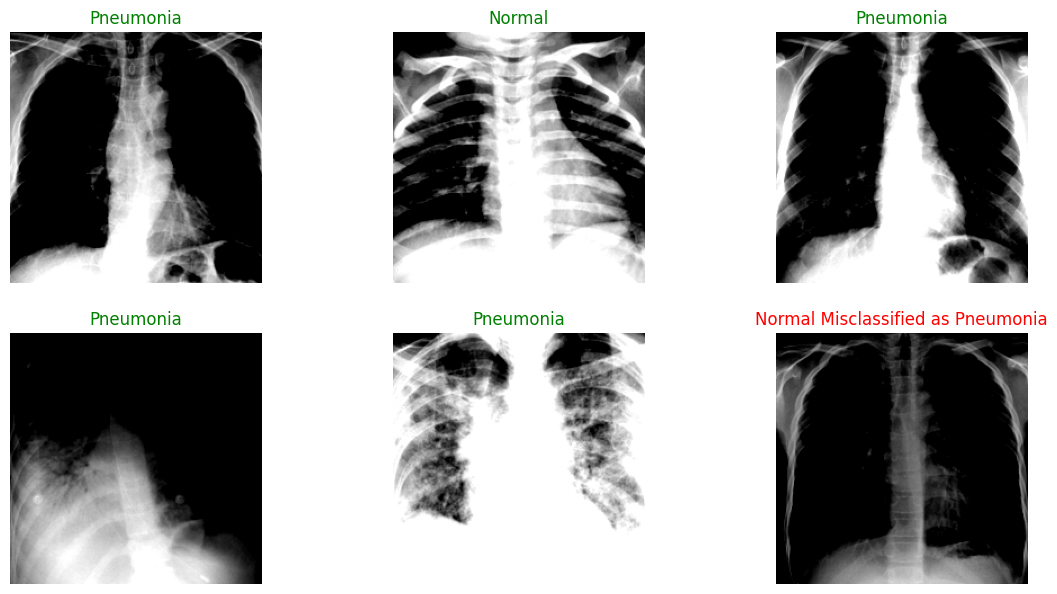

In [25]:
plot_prediction_resnet50(resnet50_model, test_loader=test_loader, class_names=class_names, device=device, n_images=6)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.6 |</span></b> Resnet101 model </b></p>

In [26]:
# Set a random seed for reproducibility
random_seed = 123
random.seed(random_seed)
torch.manual_seed(random_seed)

# If CUDA is available, set a random seed for CUDA as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)

resnet101_model = models.resnet101(weights=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 283MB/s]


In [27]:
num_ftrs = resnet101_model.fc.in_features
resnet101_model.fc = nn.Linear(num_ftrs,2)
resnet101_model.to(device)
criterion_resnet = nn.CrossEntropyLoss()

# Set up the optimizer for training.  
optimizer_resnet101 = torch.optim.SGD(resnet101_model.parameters(), lr=0.001)

train(resnet101_model, train_loader, optimizer_resnet101, criterion_resnet, scheduler=None,
          test_loader=test_loader, epochs=10, device=device)

Epoch [1/10], Training Loss: 0.617, Training Accuracy: 70.946%
Epoch [1/10], Validation Loss: 0.637, Validation Accuracy: 55.000%

Epoch [2/10], Training Loss: 0.464, Training Accuracy: 91.216%
Epoch [2/10], Validation Loss: 0.567, Validation Accuracy: 82.500%

Epoch [3/10], Training Loss: 0.412, Training Accuracy: 91.892%
Epoch [3/10], Validation Loss: 0.542, Validation Accuracy: 87.500%

Epoch [4/10], Training Loss: 0.349, Training Accuracy: 94.595%
Epoch [4/10], Validation Loss: 0.599, Validation Accuracy: 87.500%

Epoch [5/10], Training Loss: 0.316, Training Accuracy: 90.541%
Epoch [5/10], Validation Loss: 0.571, Validation Accuracy: 85.000%

Epoch [6/10], Training Loss: 0.223, Training Accuracy: 96.622%
Epoch [6/10], Validation Loss: 0.389, Validation Accuracy: 85.000%

Epoch [7/10], Training Loss: 0.222, Training Accuracy: 95.270%
Epoch [7/10], Validation Loss: 0.466, Validation Accuracy: 82.500%

Epoch [8/10], Training Loss: 0.228, Training Accuracy: 92.568%
Epoch [8/10], Valida

</div>

- The training loss seems to decrease over the epochs, which is a positive sign that the model is learning from the training data.
- However, there is a noticeable gap between the training and validation accuracy, indicating a potential issue with overfitting. The model seems to perform well on the training data but struggles to generalize to unseen data, as evidenced by the varying validation accuracy.
- The fluctuating validation loss and accuracy indicate that the model may not have reached its full learning potential and could benefit from further fine-tuning or regularization techniques to prevent overfitting

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.7 |</span></b> Predictions for Resnet101 model </b></p>

In [28]:
def plot_prediction_resnet101(model, test_loader, class_names, device, n_images):
    """
    Test the model on random predictions
    Args:
    model: the trained model
    test_loader: DataLoader instance for the test dataset
    class_names: list of class names
    device: the device on which to run the model (e.g., 'cuda' or 'cpu')
    n_images: number of images to plot
    """
    resnet101_model.eval()
    with torch.no_grad():
        fig = plt.figure(figsize=(14, 15))
        for i, (images, labels) in enumerate(test_loader):
            if i >= n_images:
                break
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            for j in range(images.shape[0]):
                if i >= n_images:
                    break
                plt.subplot(4, 3, i + 1)
                image = images.cpu().numpy()[j].transpose(1, 2, 0)
                label = labels.cpu().numpy()[j]
                prediction = predictions.cpu().numpy()[j]
                plt.imshow(image)
                if prediction == label:
                    title_obj = plt.title(class_names[label])
                    plt.setp(title_obj, color='g')
                else:
                    title_obj = plt.title(class_names[label] + ' Misclassified as ' + class_names[prediction])
                    plt.setp(title_obj, color='r')
                plt.axis('off')
                i += 1
        plt.show()

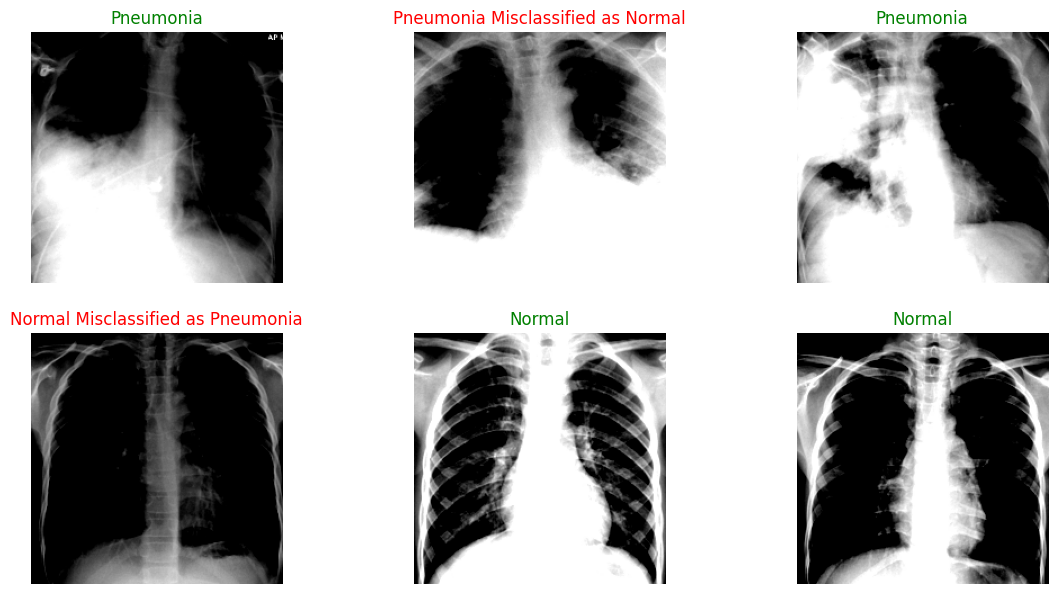

In [29]:
plot_prediction_resnet101(resnet101_model, test_loader=test_loader, class_names=class_names, device=device, n_images=6)

## <b>7 <span style='color:#F1A424'>|</span> Thanks</b>
</div>

- Thank you for reading the whole notebook.
- If you have any feedback please let me know
- If you found that useful please give me your upvote. 